# Elementary Cellular Automata

The simplest type of cellular automaton is a binary, nearest-neighbor, one-dimensional automaton. Such automata were called "elementary cellular automata" by S. Wolfram, who has extensively studied their amazing properties (Wolfram 1983; 2002, p. 57). There are 256 such automata, each of which can be indexed by a unique binary number whose decimal representation is known as the "rule" for the particular automaton. An illustration of rule 30 is shown above together with the evolution it produces after 15 steps starting from a single black cell.

📙 [reference](https://mathworld.wolfram.com/CellularAutomaton.html)


# Implementation

In [84]:
import numpy as np
import matplotlib.pyplot as plt

class Automata:
    def __init__(self, size = 200, generations = 100):
        # number of total cells 
        self.size = size
        # number of total generations 
        self.generations = generations

    @staticmethod
    def decimalToBin(decimal, digits):
        """
        Convert decimal number to binary number.
    
        Args:
            decimal (int): Decimal number.
            digits (int): Number of digits.
    
        Returns:
            NDArray[Any]: Binary Number.
        """
        bin = np.zeros(digits)
        sub = decimal
        sum = 0
        while sub >= 1:
            bin[sum] = int(sub % 2)
            sub = sub / 2
            sum += 1
        return bin[::-1]
    
    @staticmethod
    def binToDecimal(bin):
        """
        Convert binary number to decimal number.
    
        Args:
            bin (array_like): Binary number.
    
        Returns:
            NDArray[Any]: Decimal Number.
        """
        number = 0
        arr = bin[::-1]
        for idx, digit  in enumerate(arr):
            number = number + pow(2, idx) * digit
        return int(number)
    
    def simulate(self, rule):
        """
        Simulate the evolution of a signle cell after N generations by applying a specific rule.
    
        Args:
            rule (array_like): Rule's binary number.
    
        Returns:
            NDArray[Any]: Matrix of all generations.
        """
        mid = (self.size / 2)

        matrix = np.zeros([1, self.size + 1])
        matrix[0][int(mid)] = 1

        rule = np.array(self.decimalToBin(rule, 8))[::-1]

        generation = np.copy(matrix[-1])

        t = 1

        while t < self.generations:
            nextGen = np.zeros(len(generation))
            for idx in range(len(generation)):
                neighbors = np.zeros(3)
                if idx == 0 :
                    neighbors[0] = generation[-1]
                    neighbors[1] = generation[idx]
                    neighbors[2] = generation[idx + 1]
                elif idx == len(generation) - 1:   
                    neighbors[0] = generation[idx - 1]
                    neighbors[1] = generation[idx] 
                    neighbors[2] = generation[0]
                else:
                    neighbors[0] = generation[idx - 1]
                    neighbors[1] = generation[idx]
                    neighbors[2] = generation[idx + 1]
                
                nextGen[idx] = rule[self.binToDecimal(neighbors)]

            generation = nextGen
            matrix = np.append(matrix, generation.reshape(1, len(generation)), axis=0)
            t += 1  
        return matrix

# Generate And Plot Rule 0-255

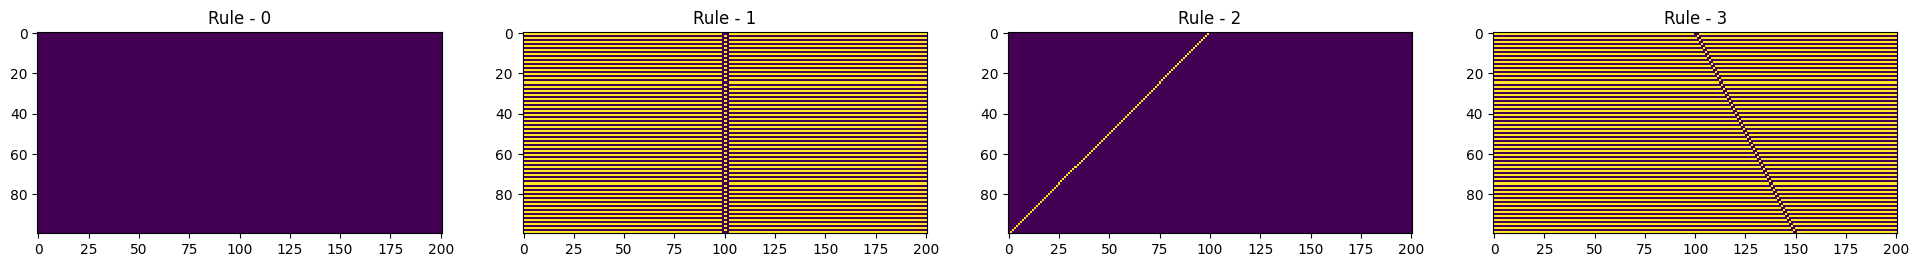

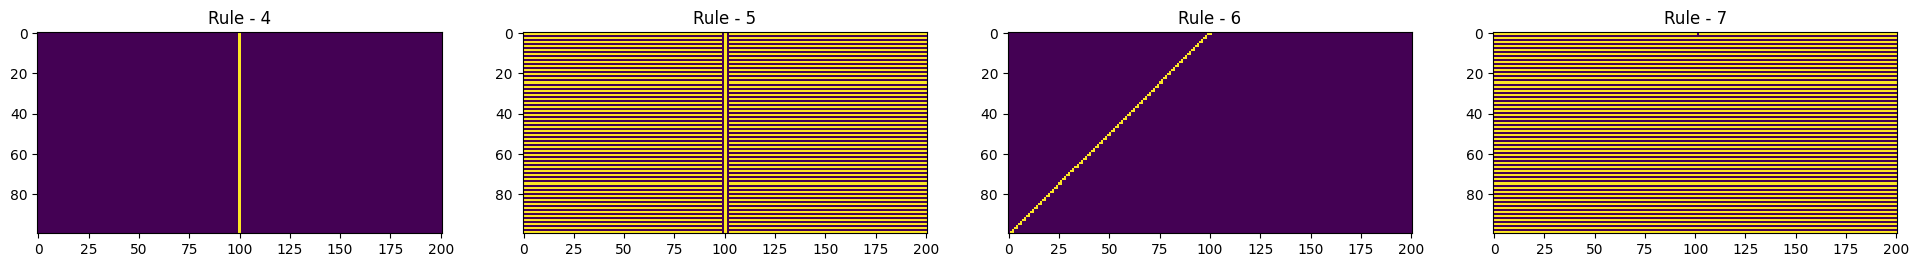

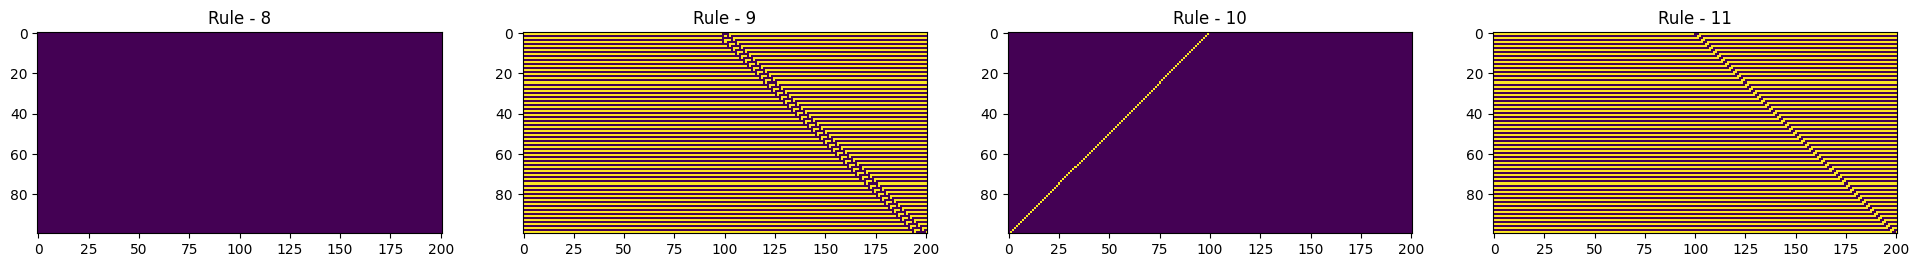

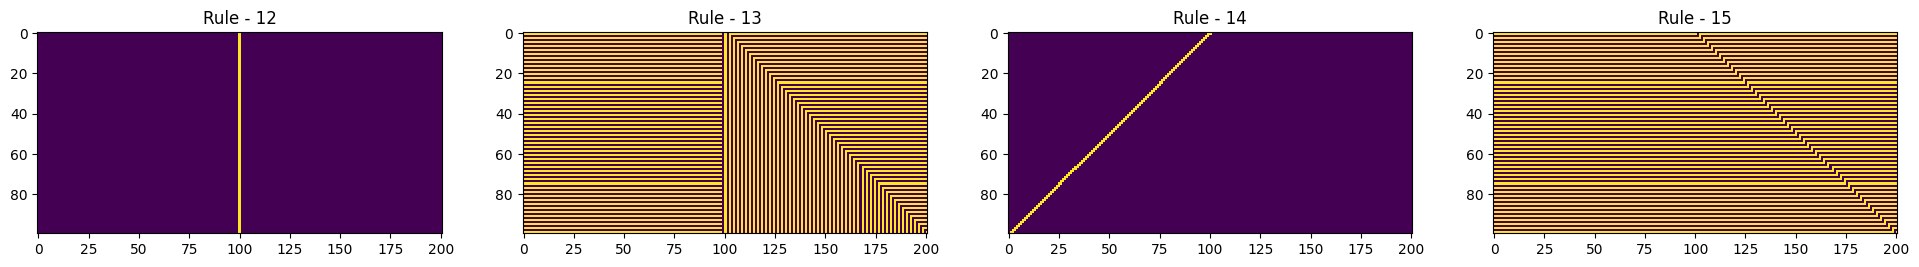

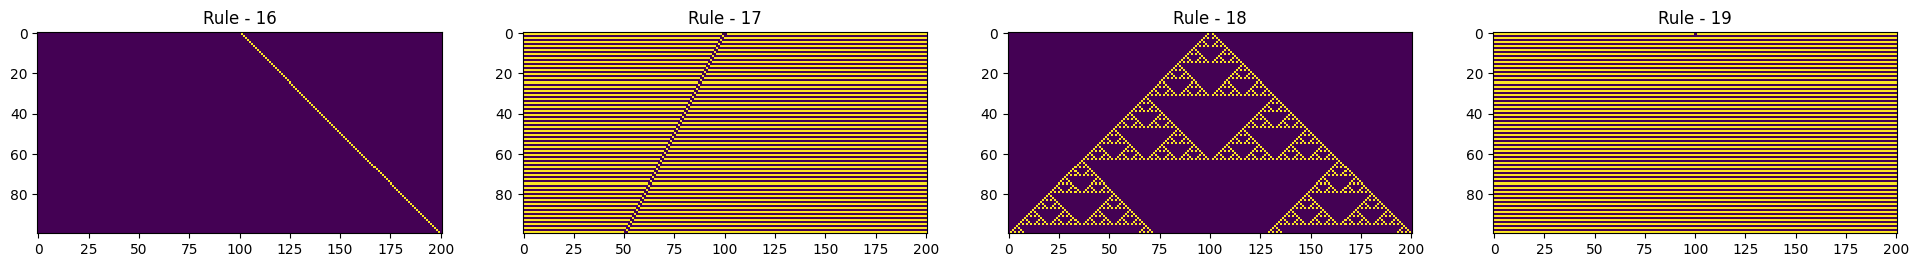

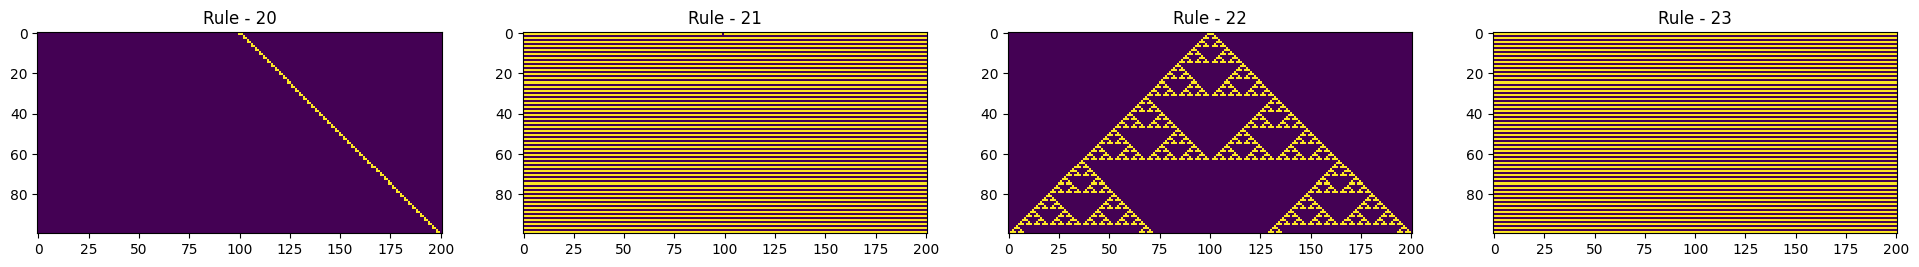

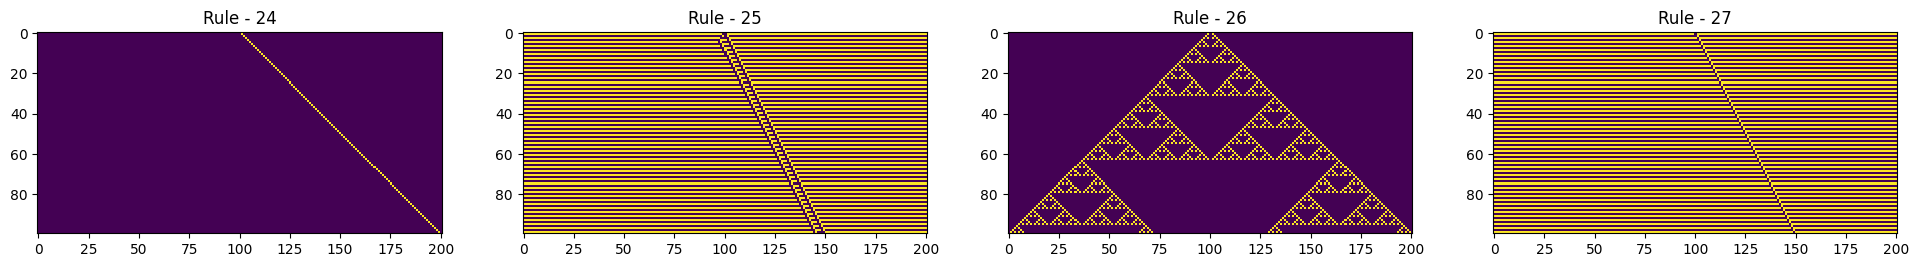

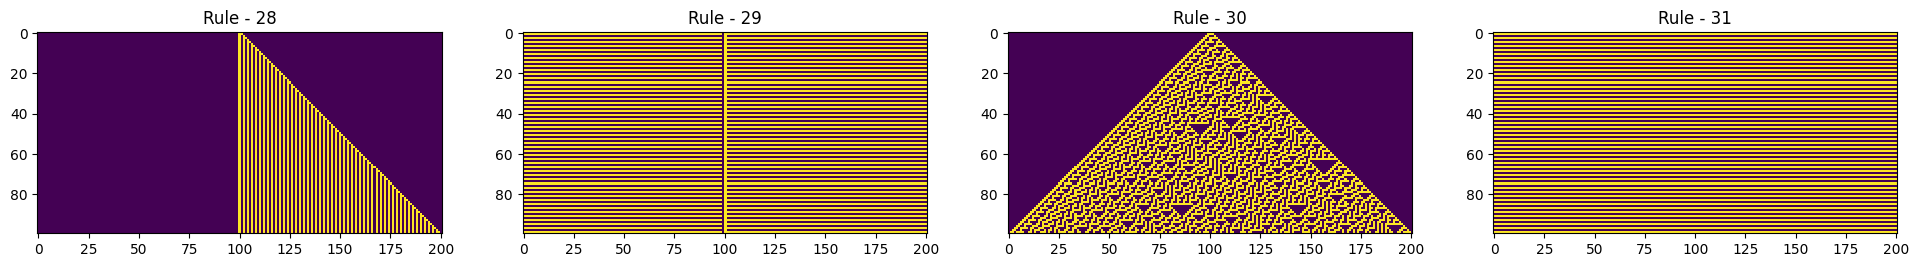

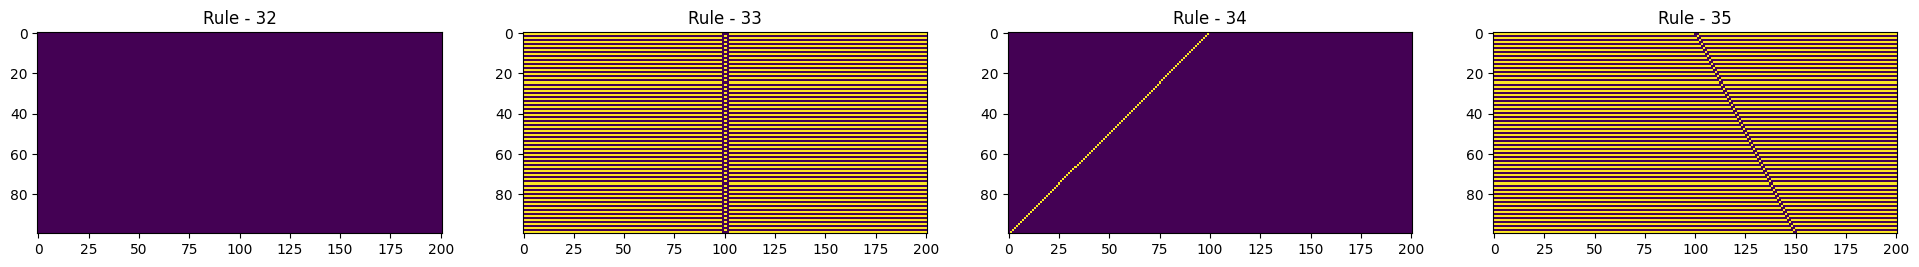

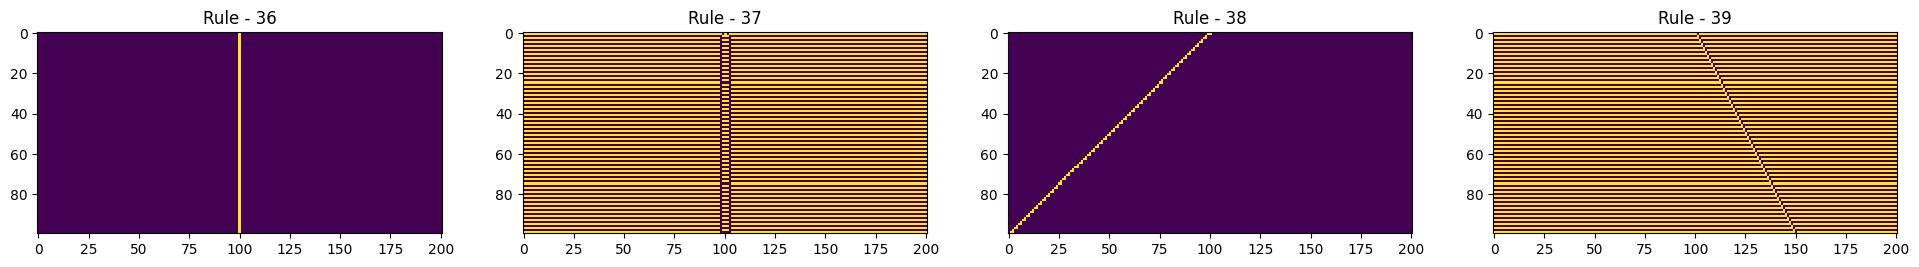

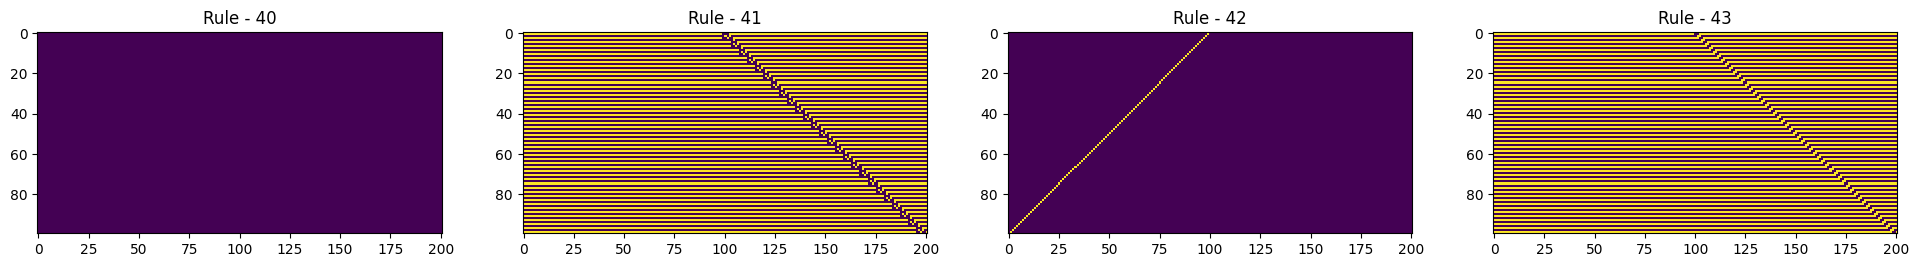

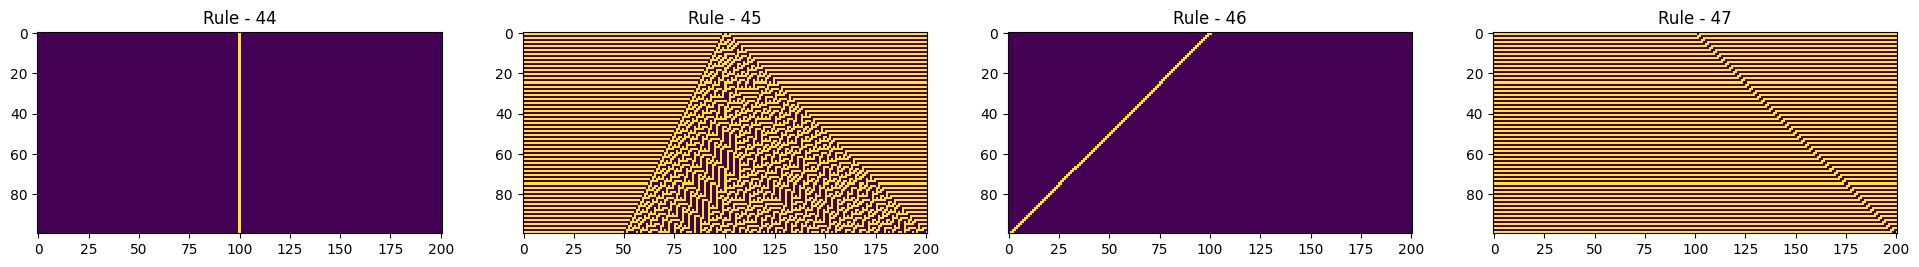

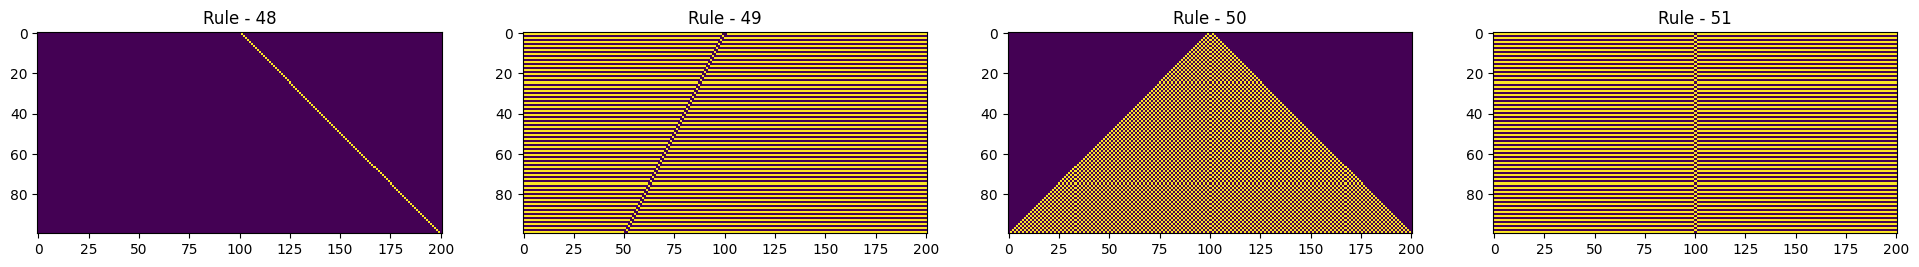

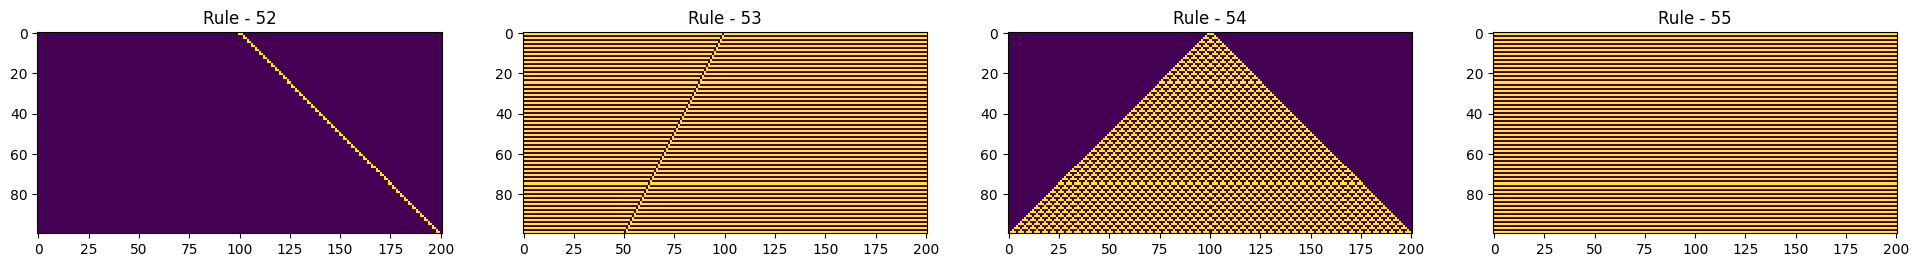

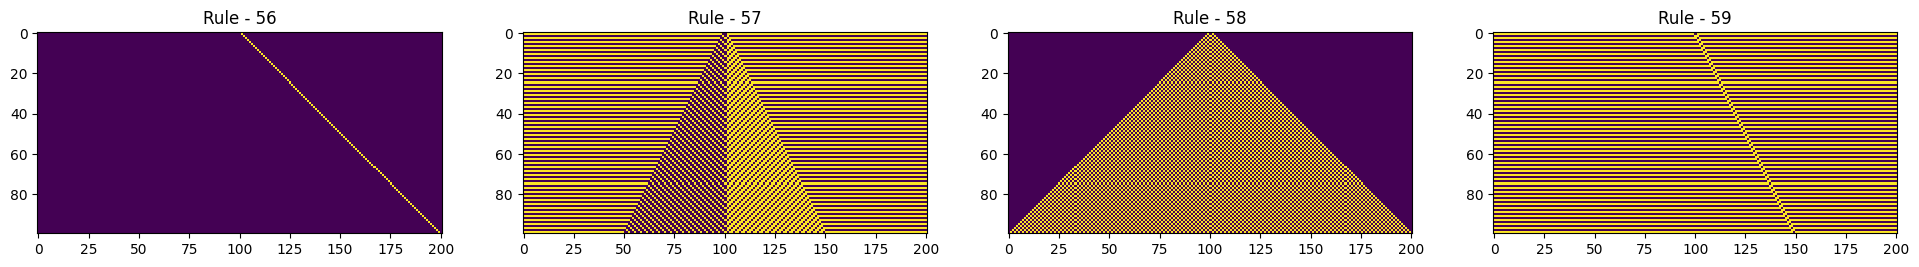

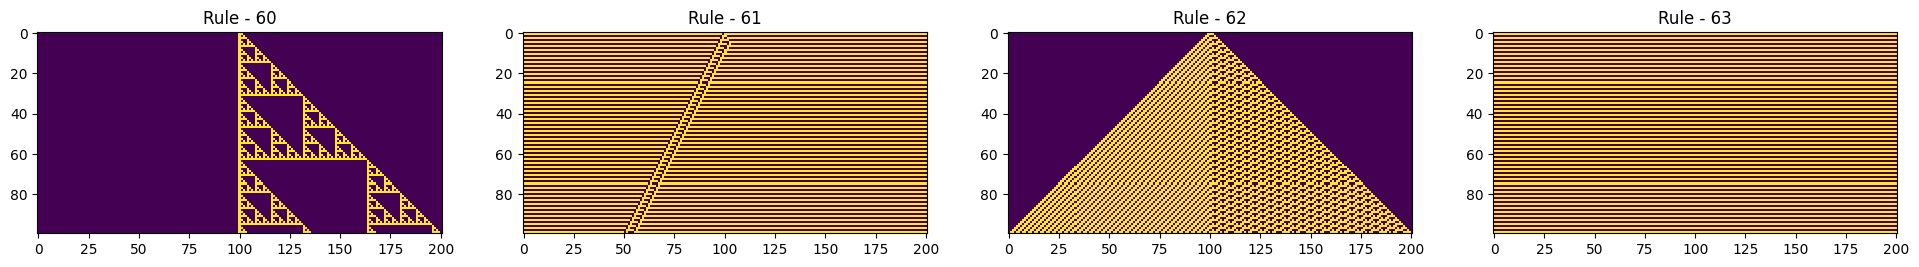

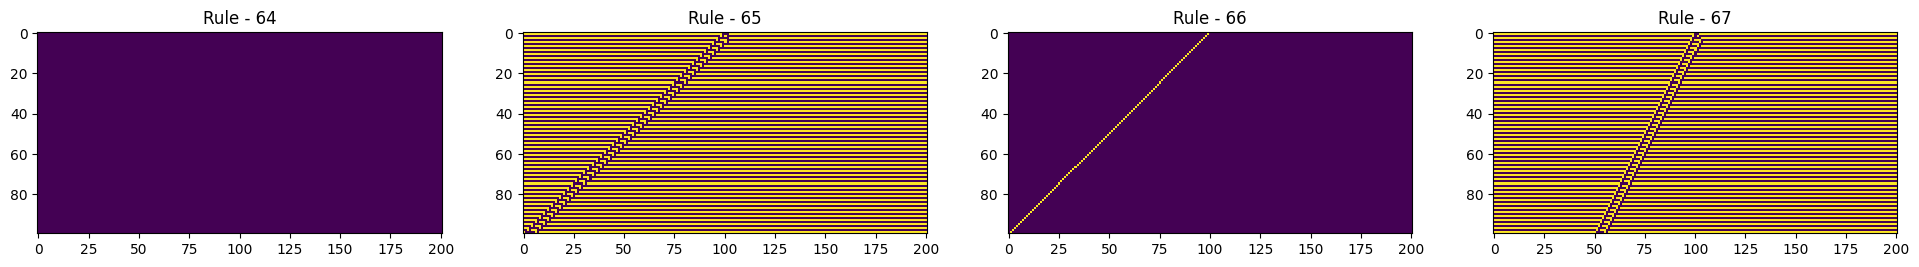

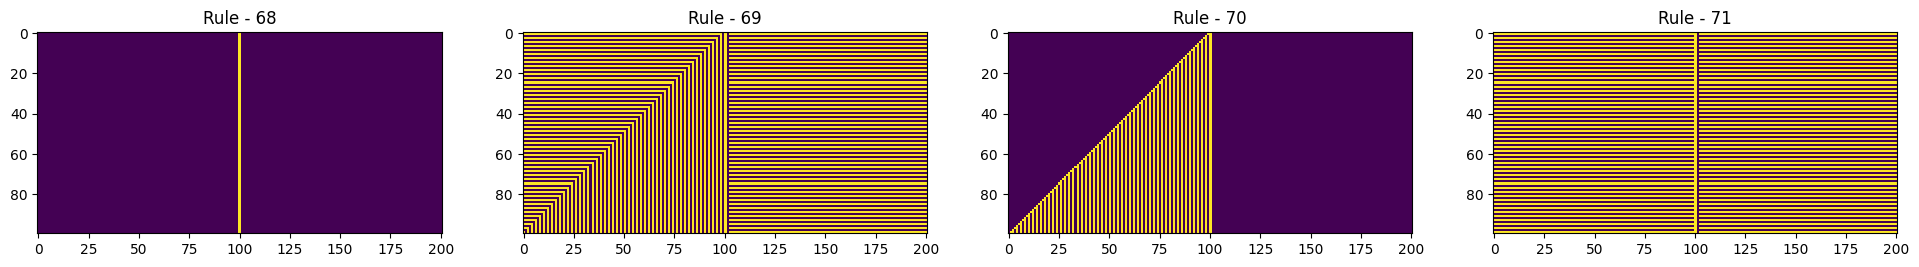

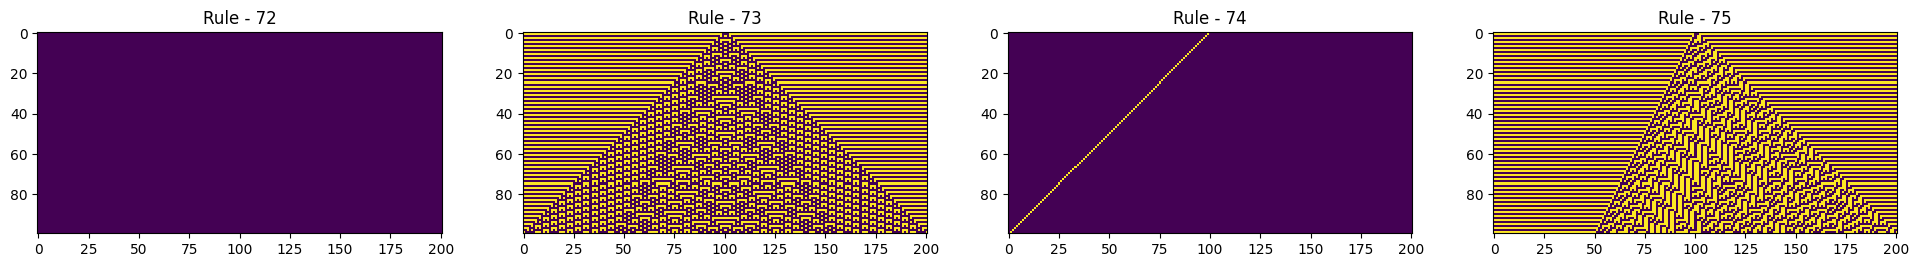

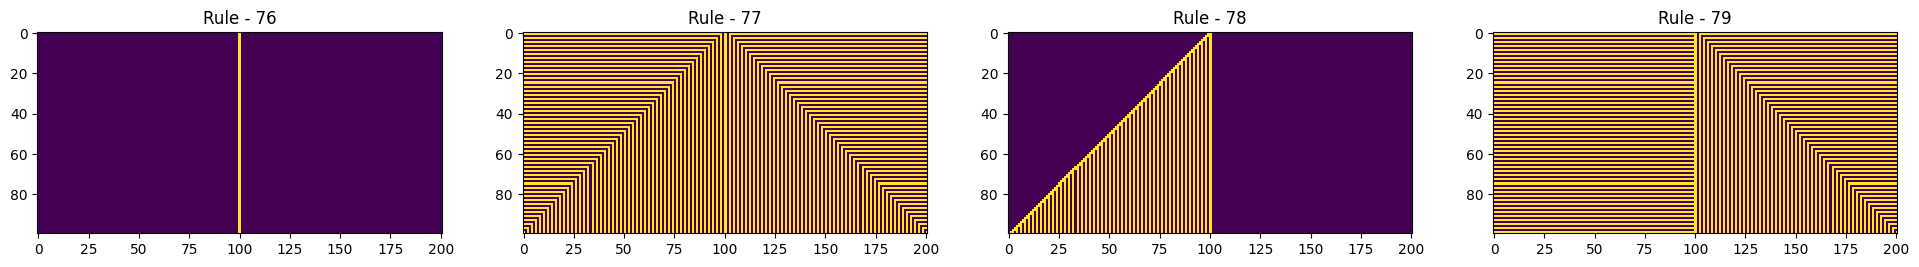

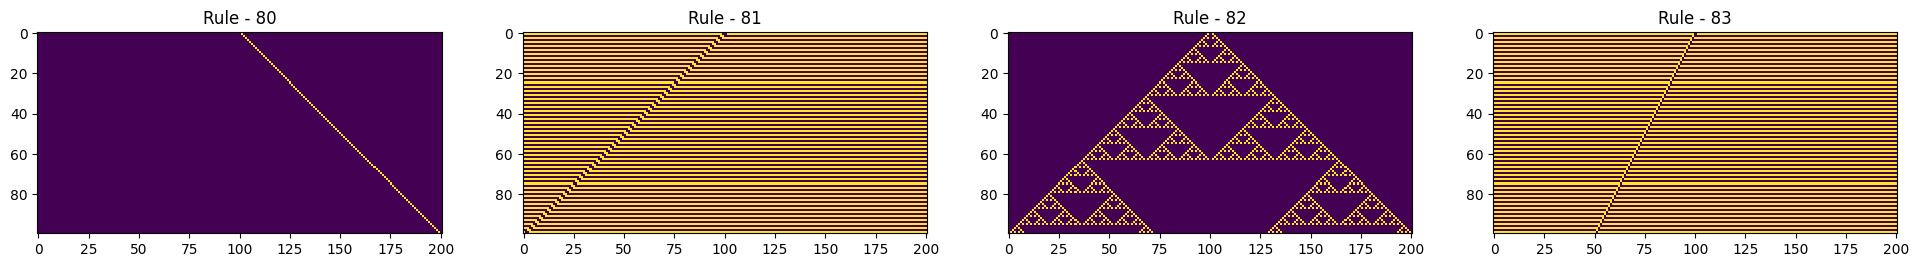

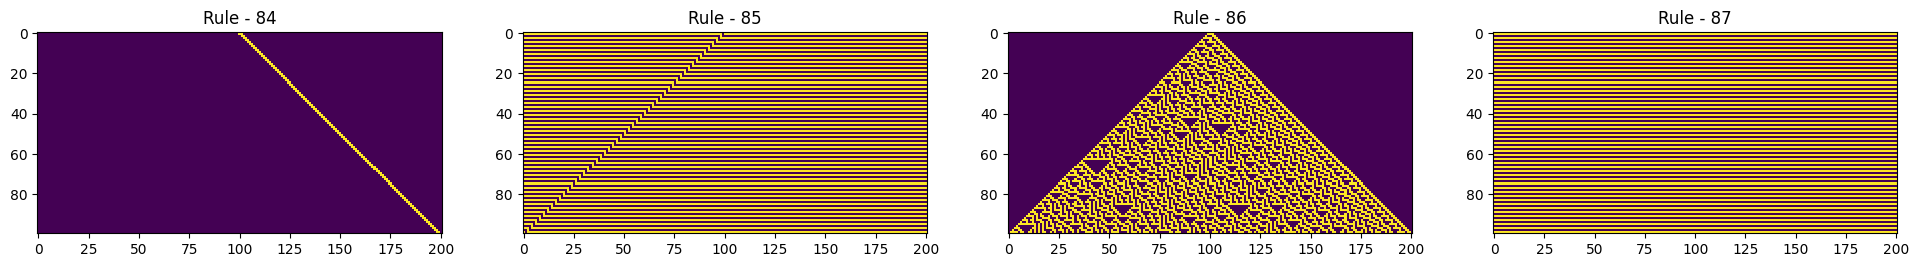

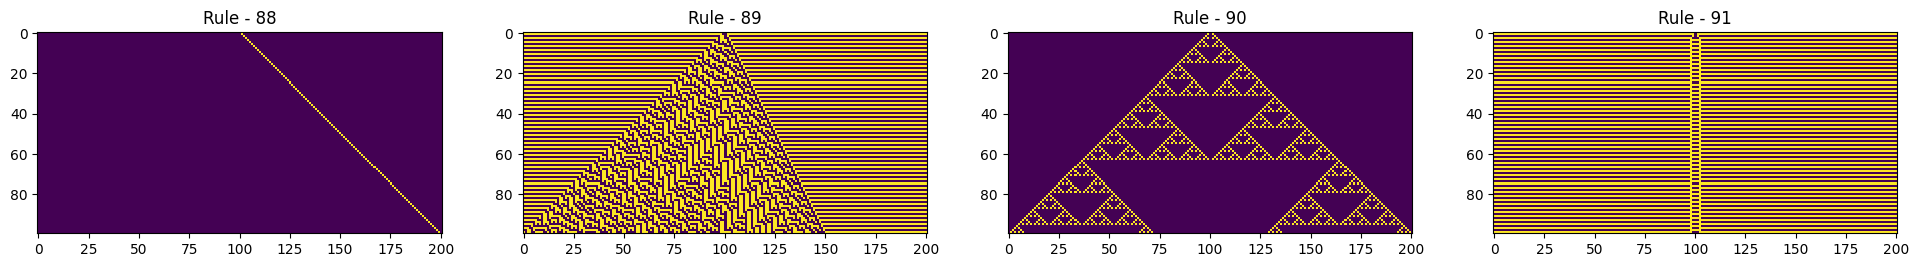

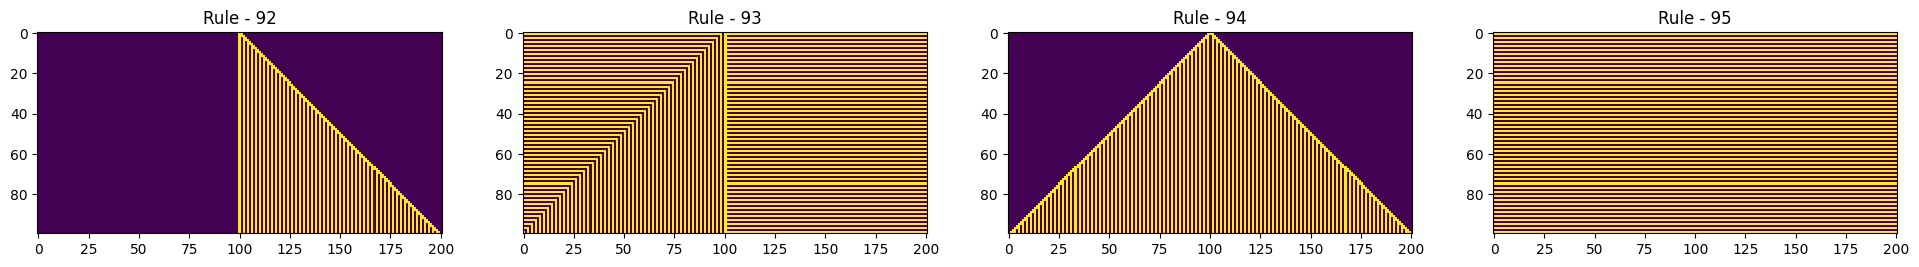

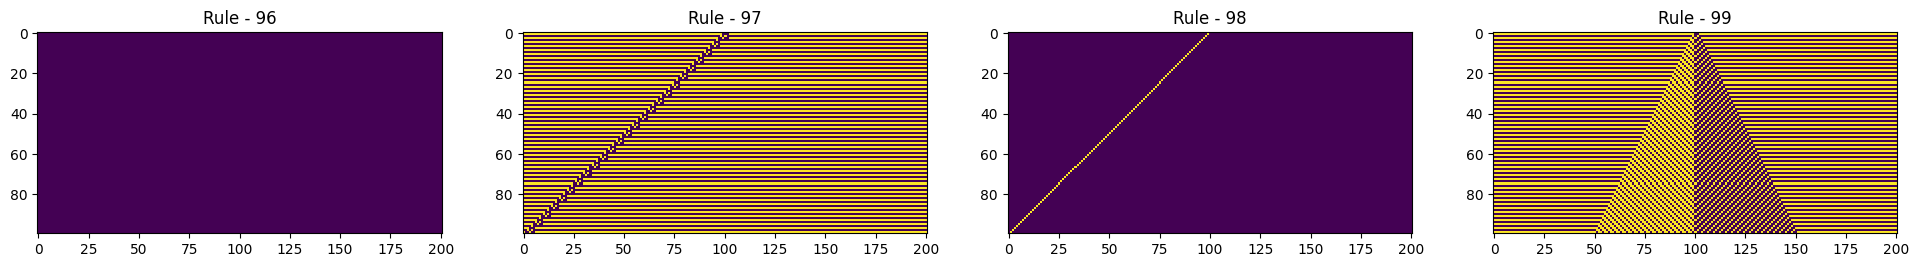

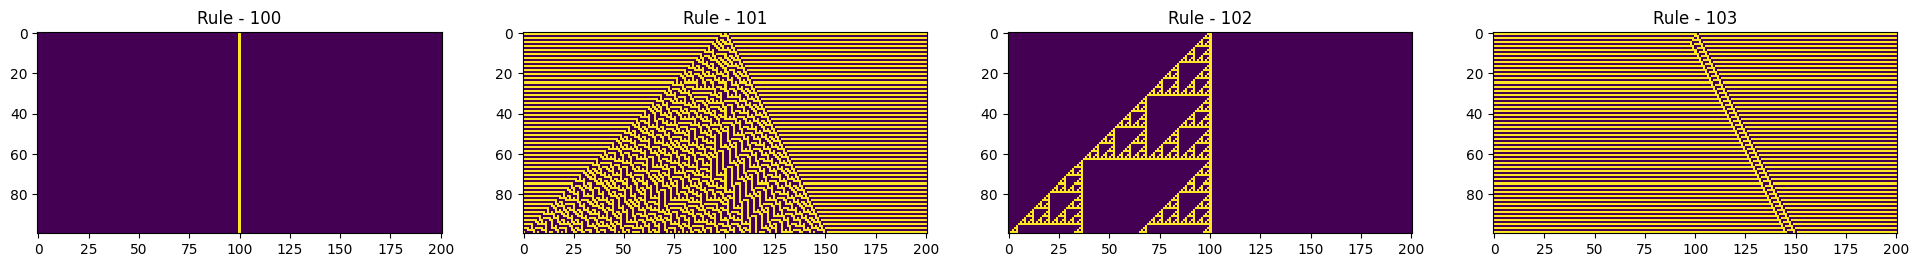

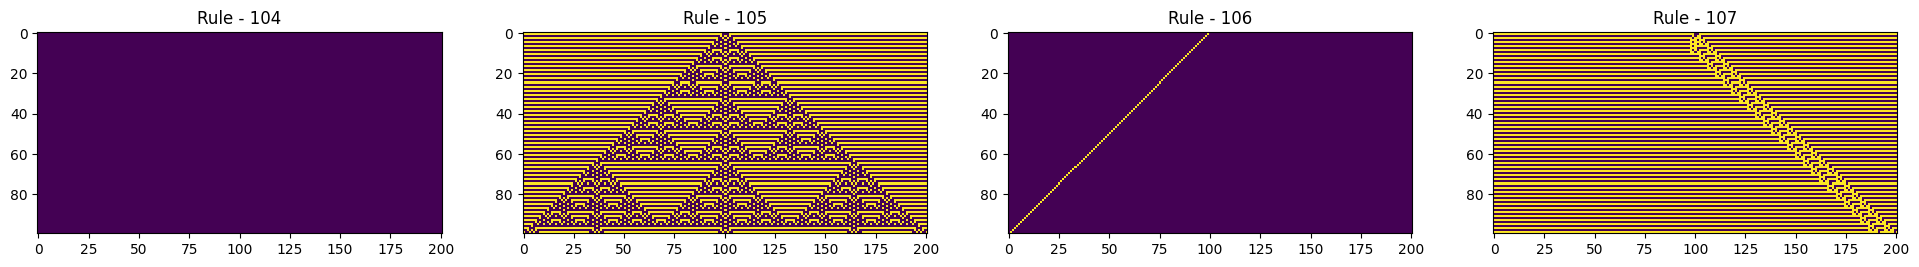

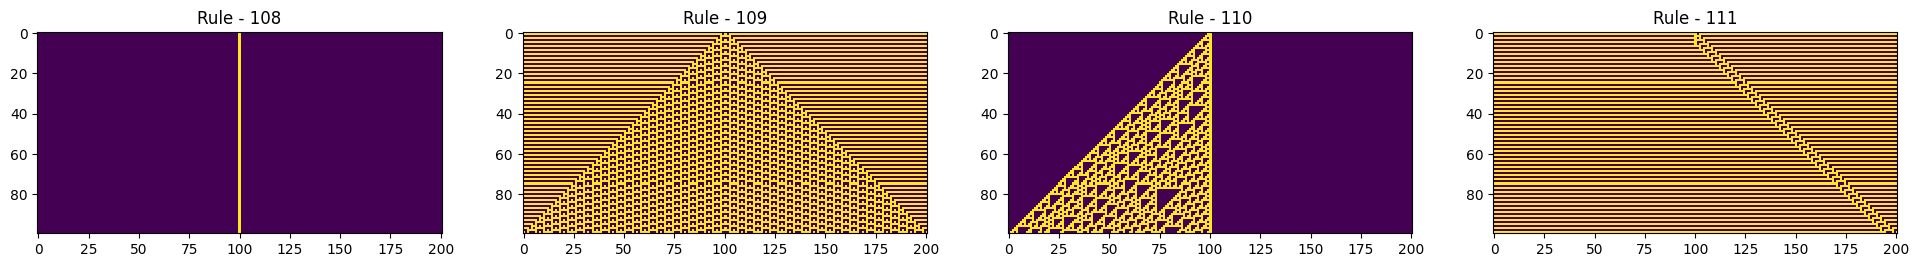

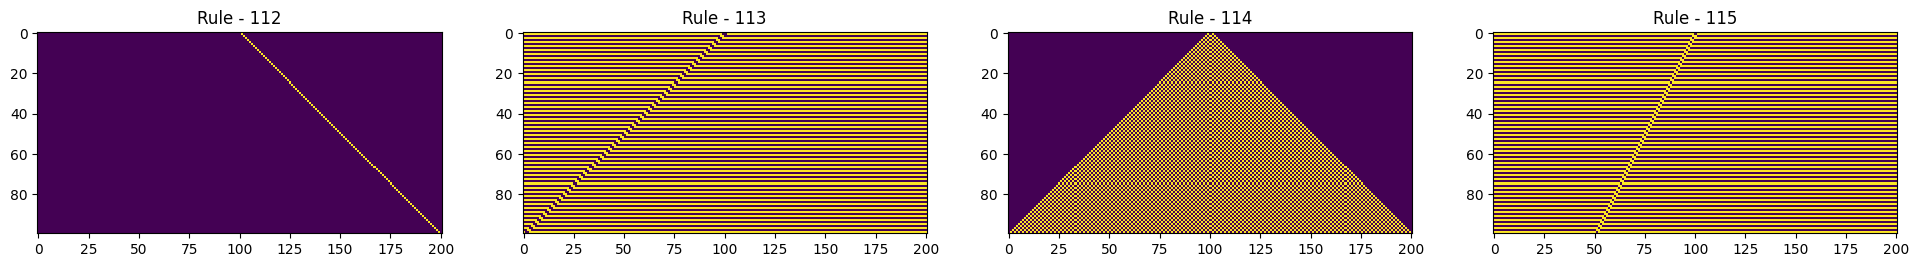

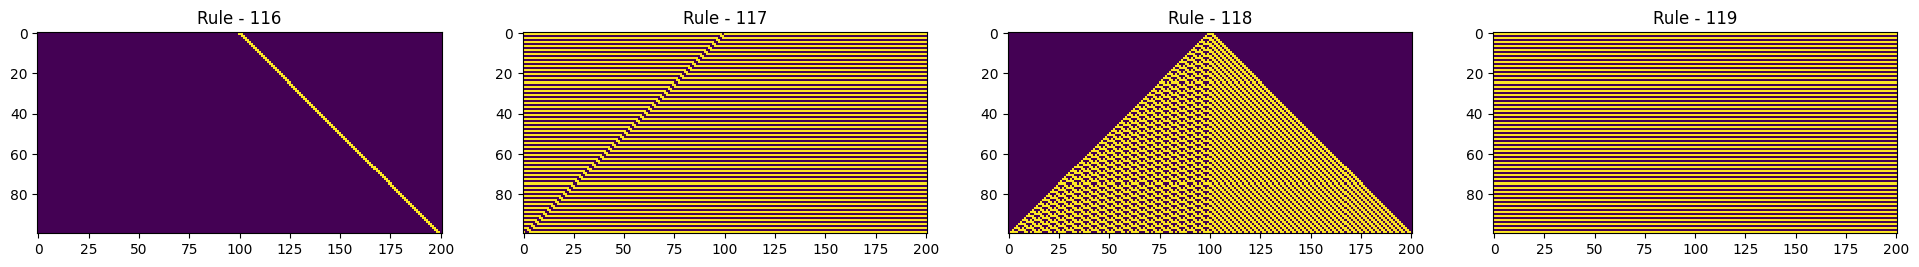

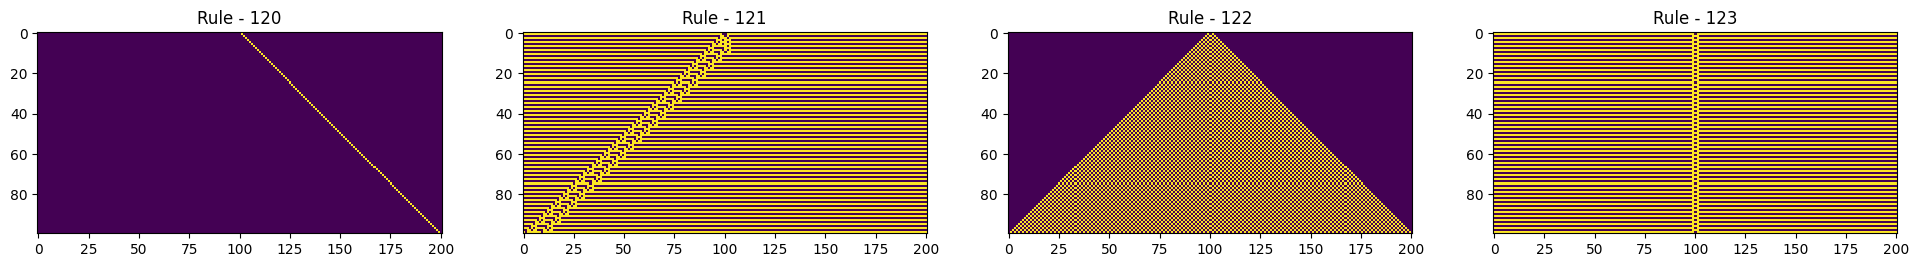

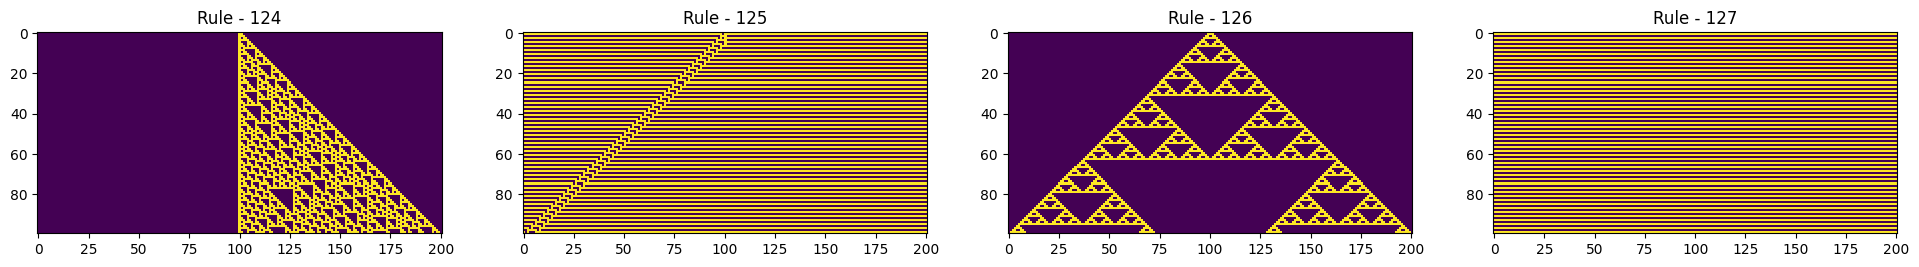

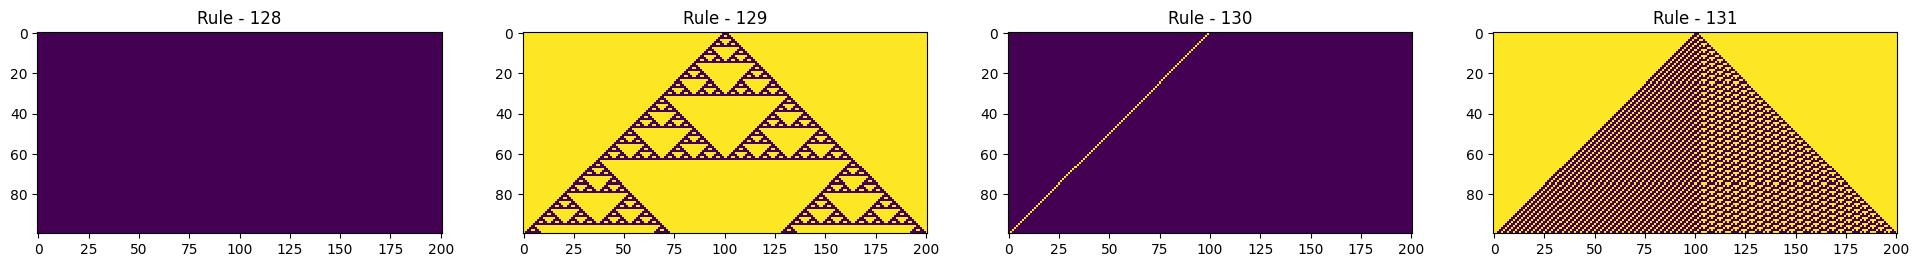

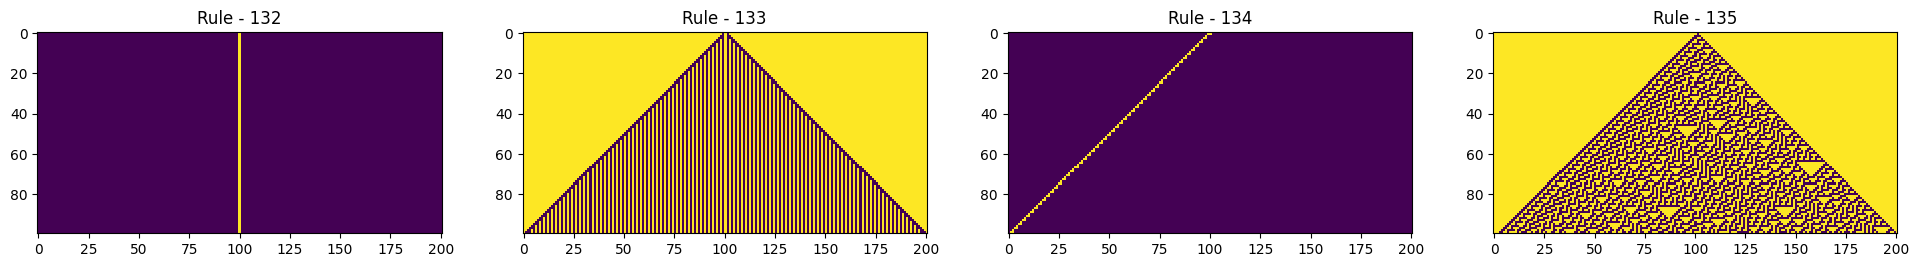

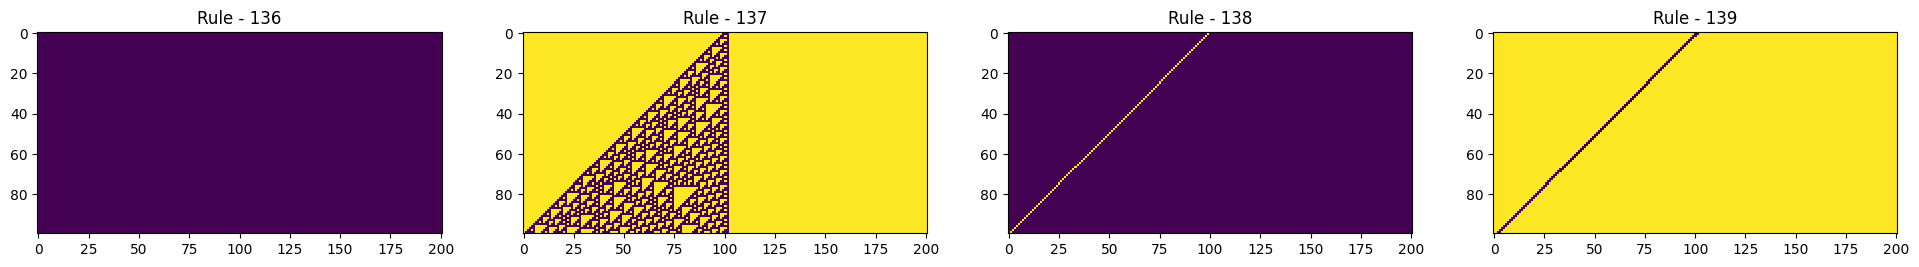

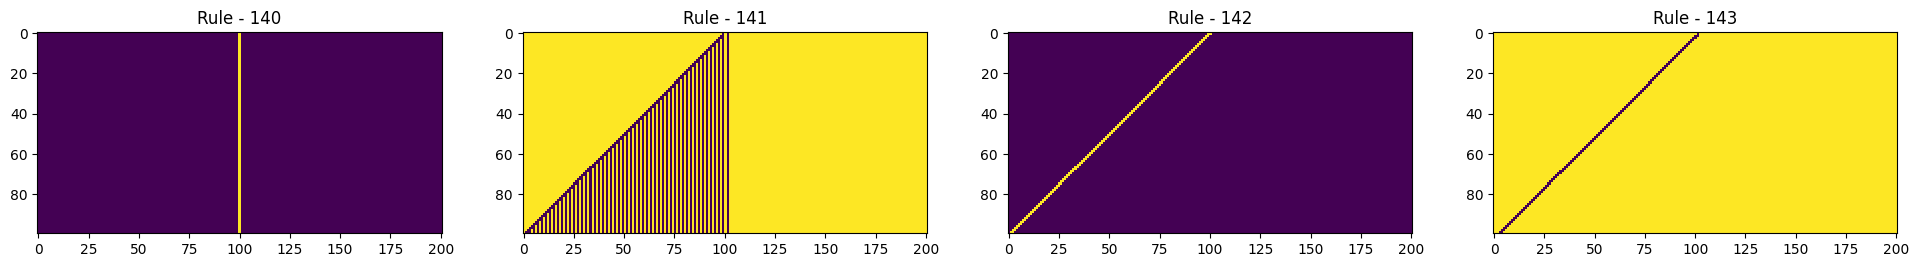

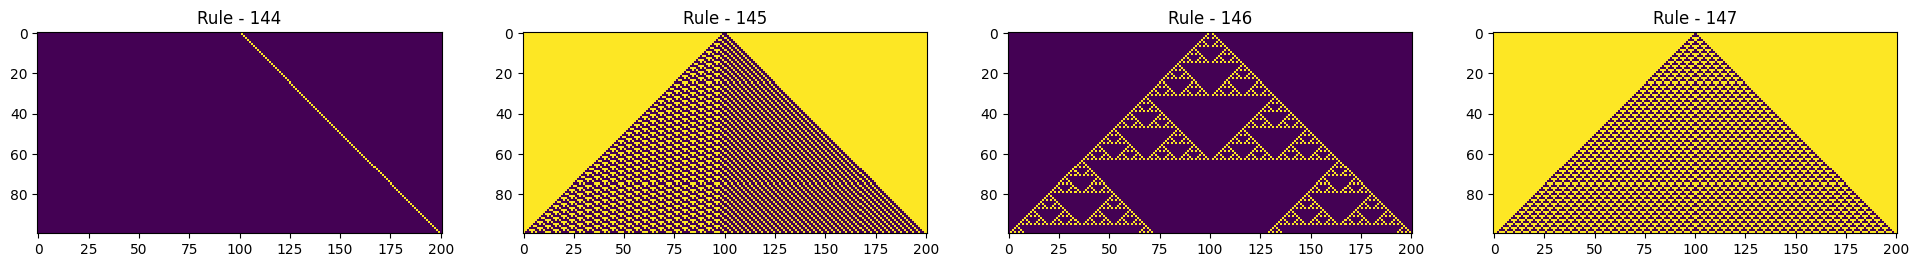

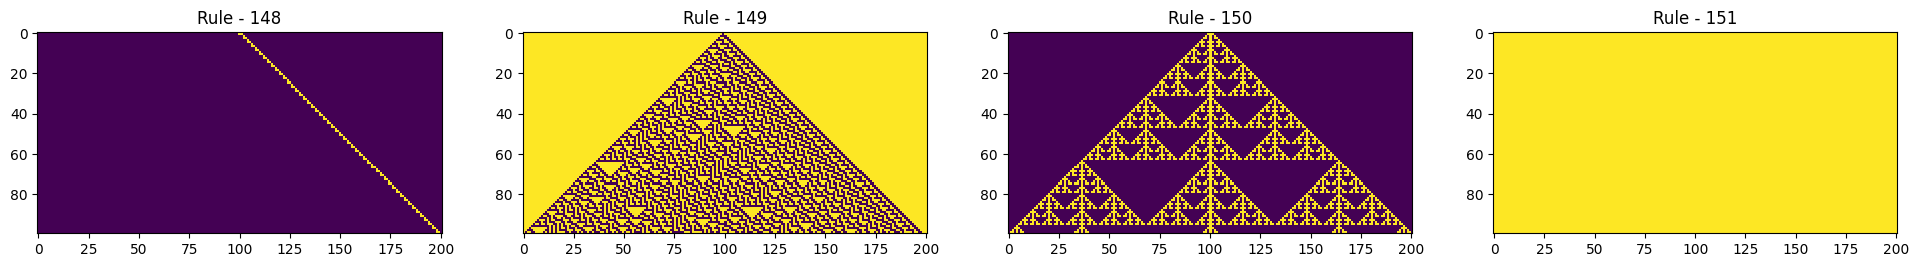

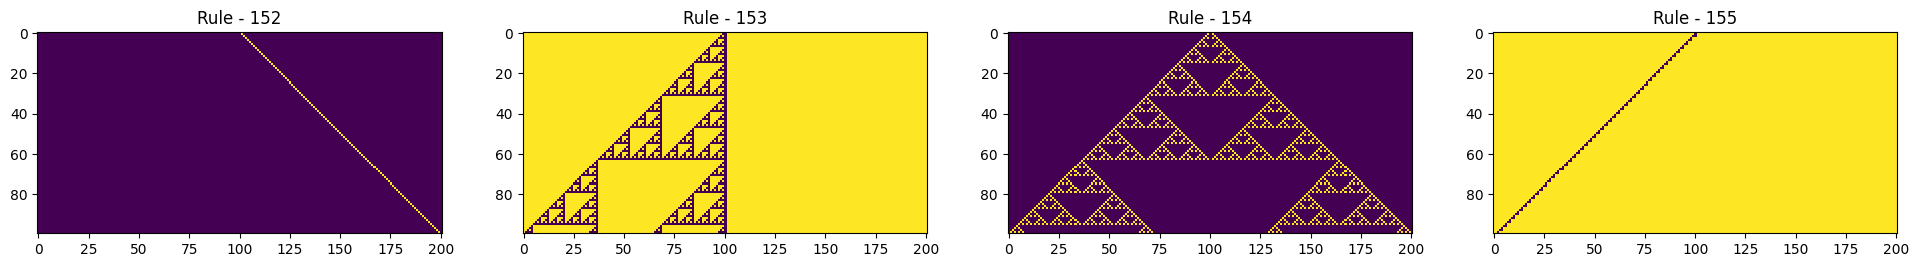

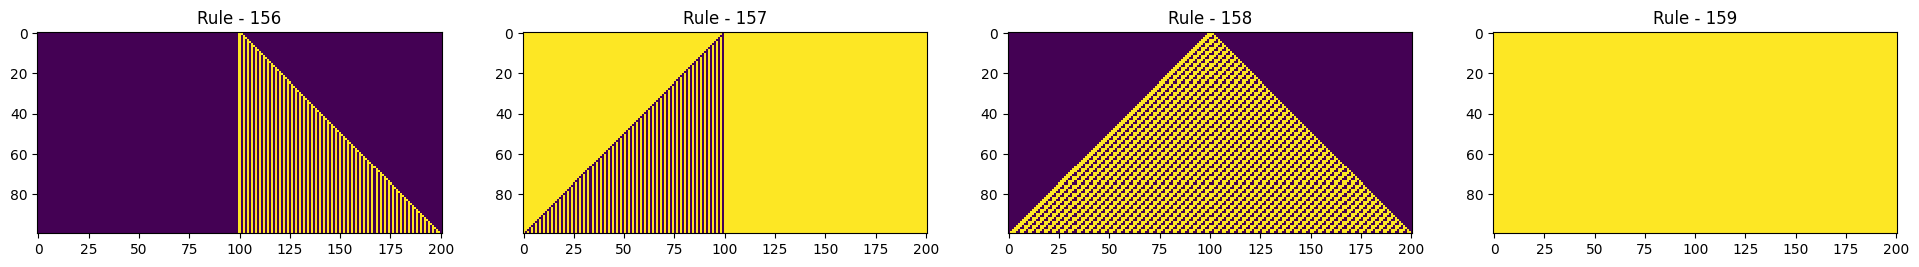

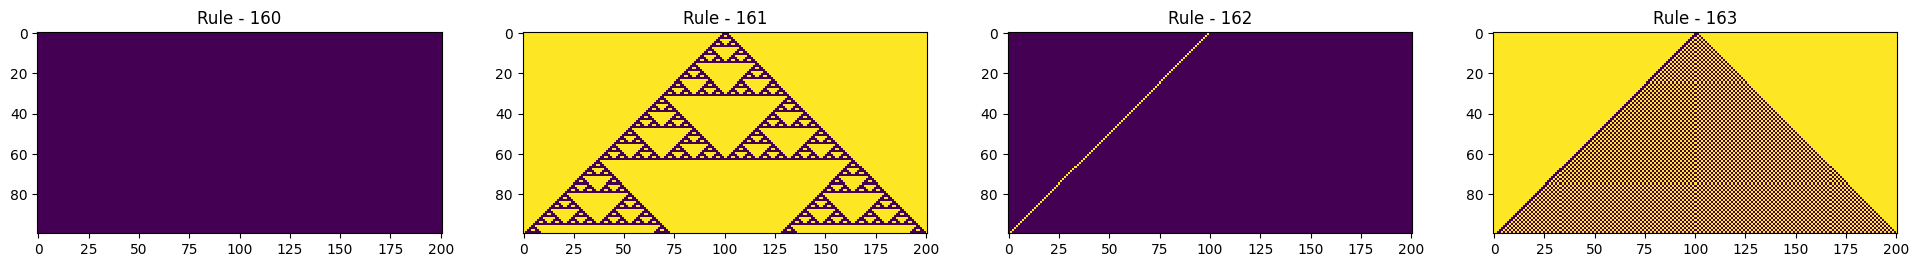

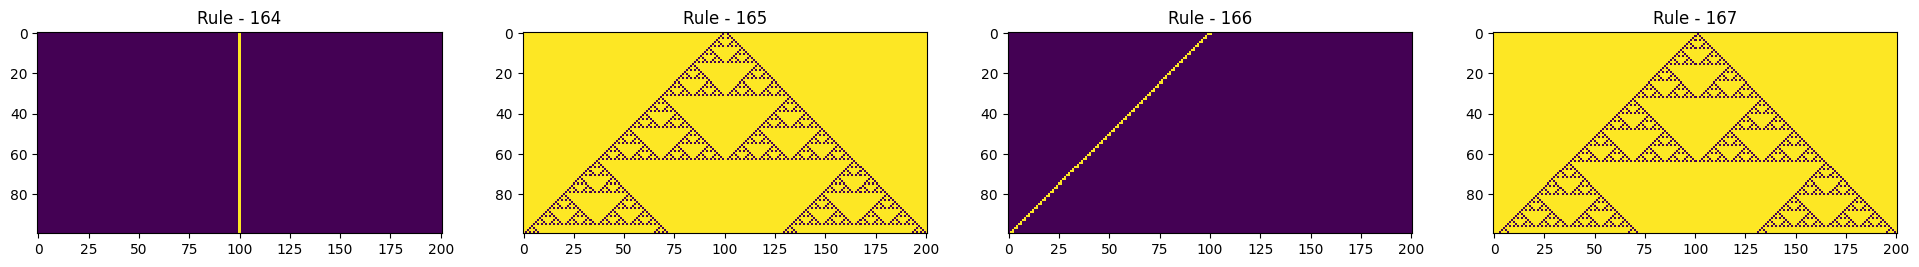

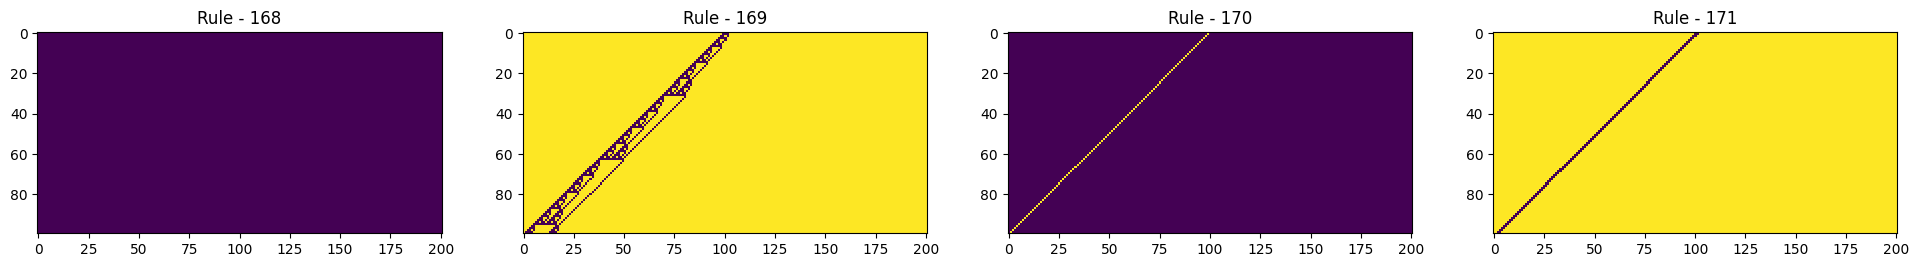

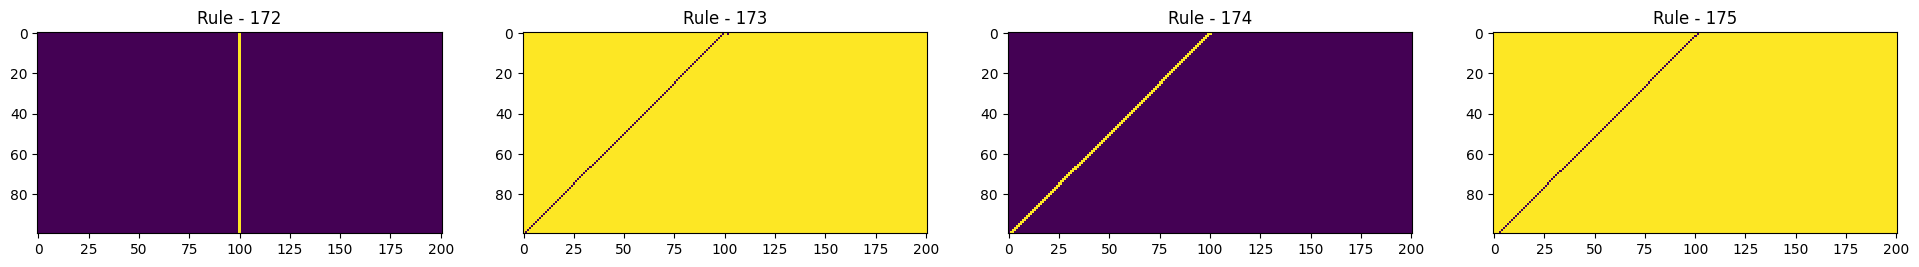

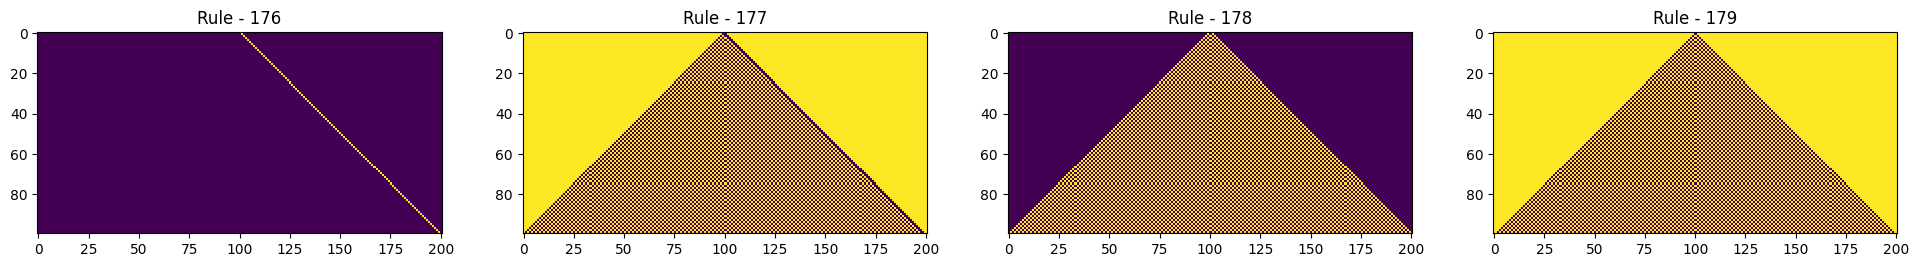

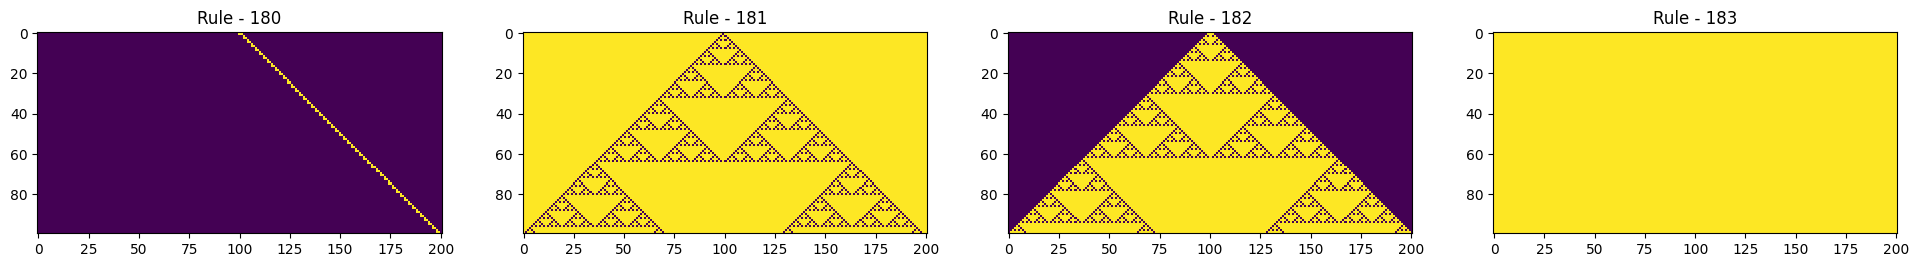

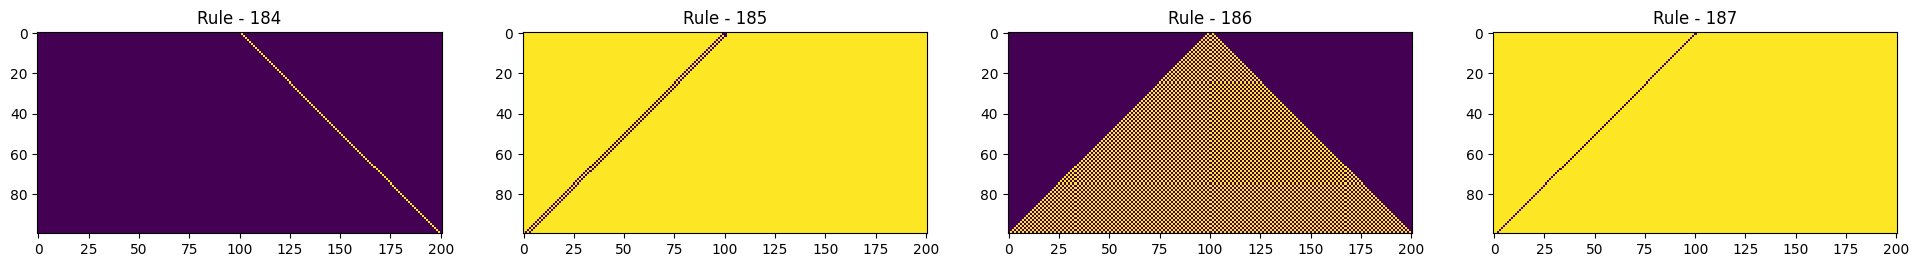

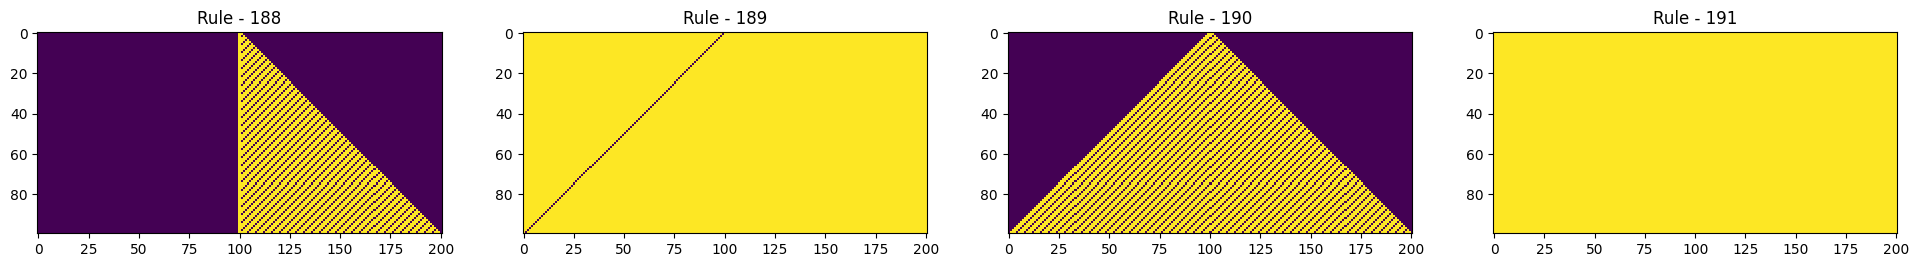

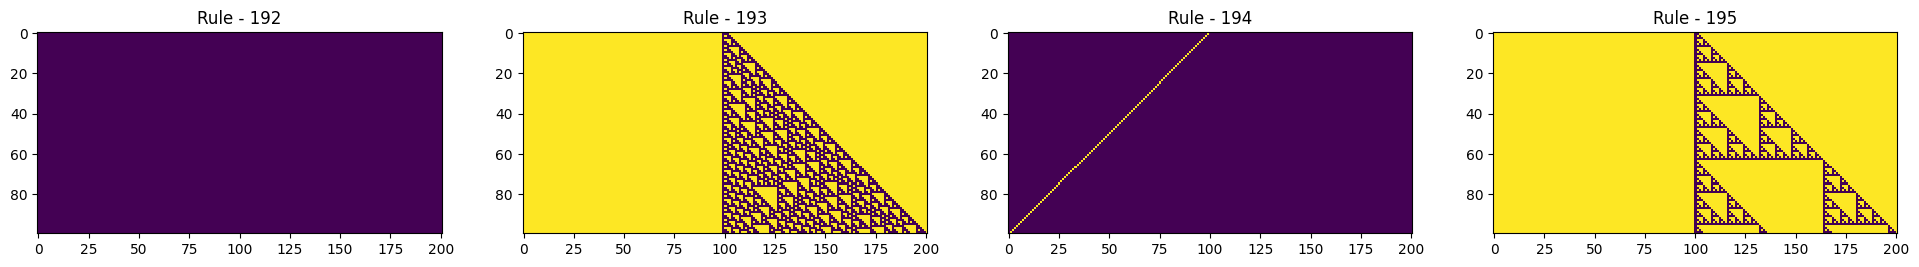

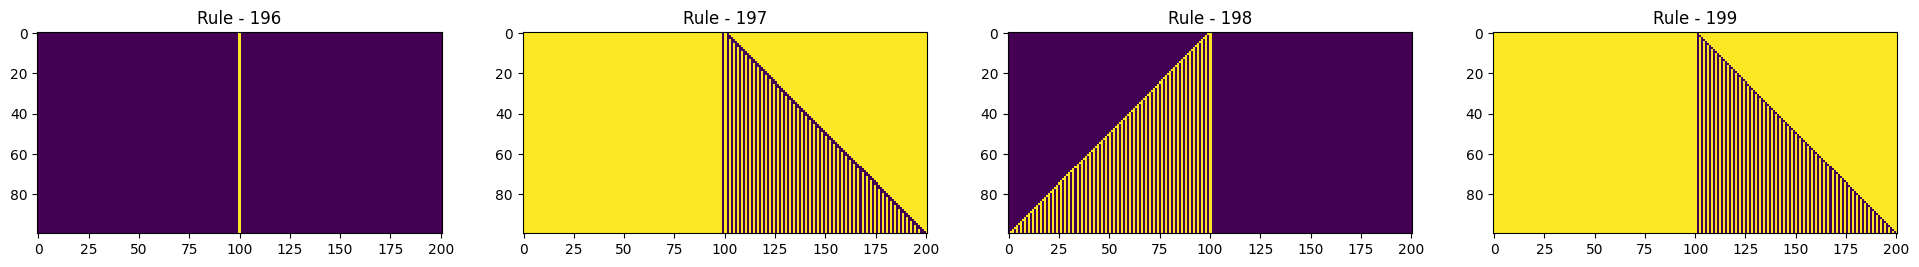

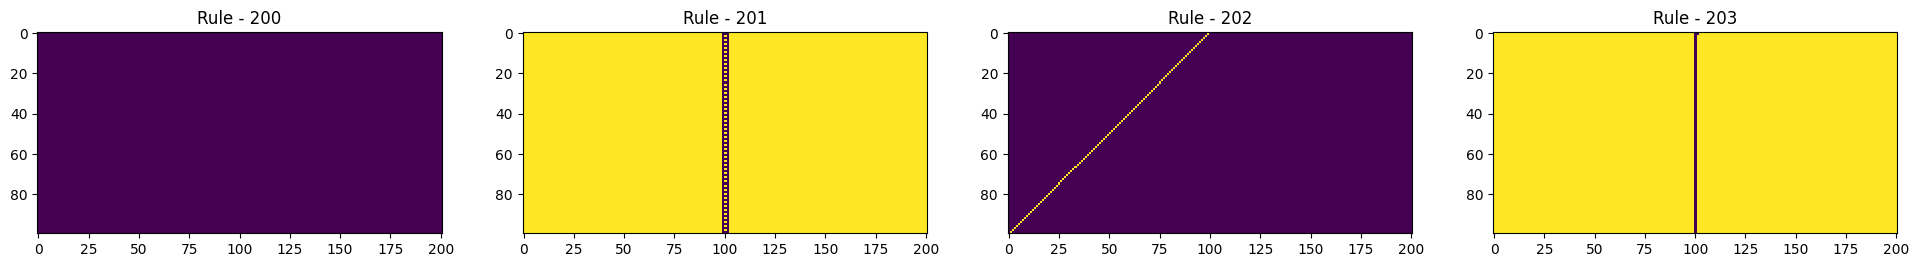

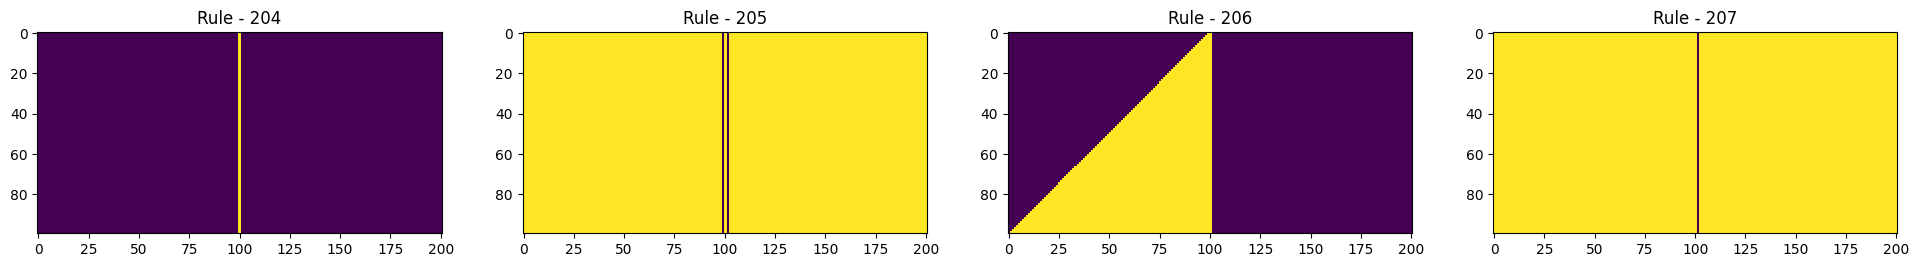

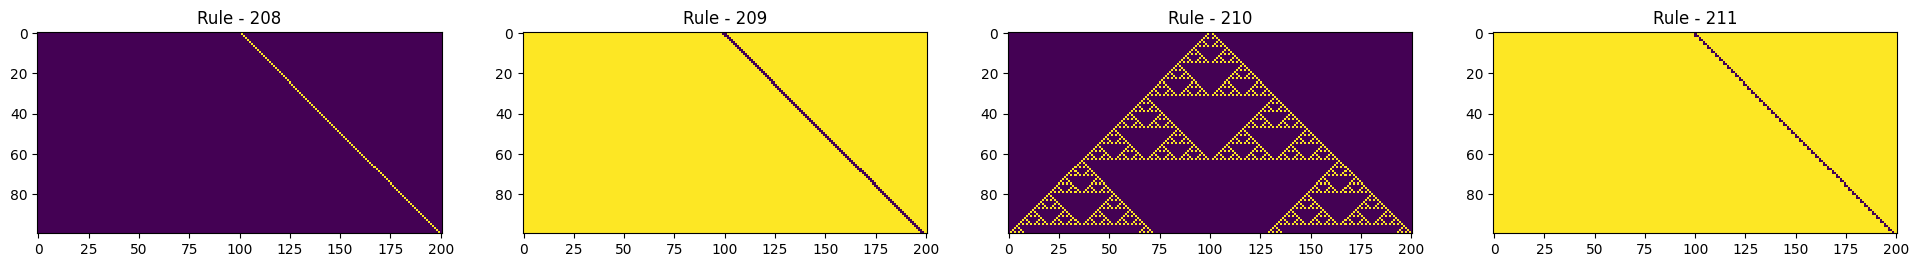

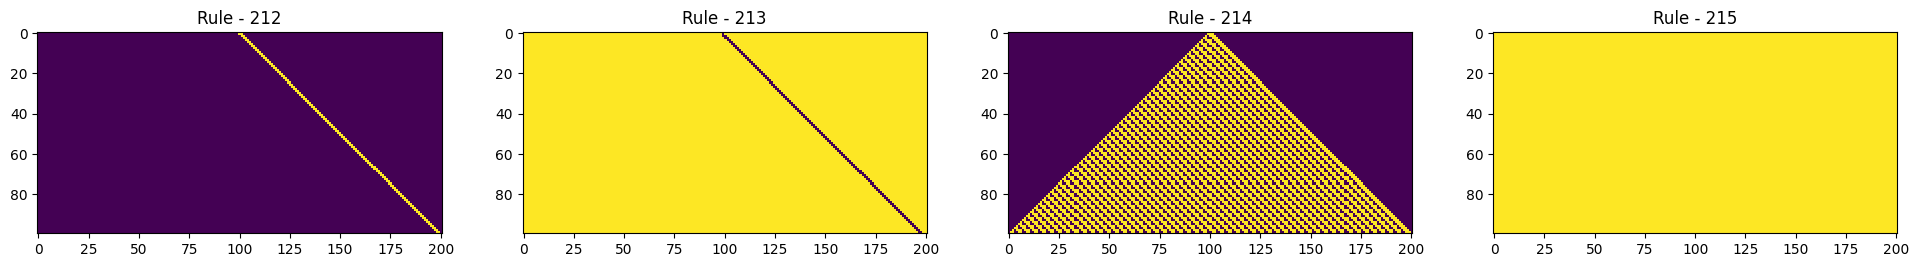

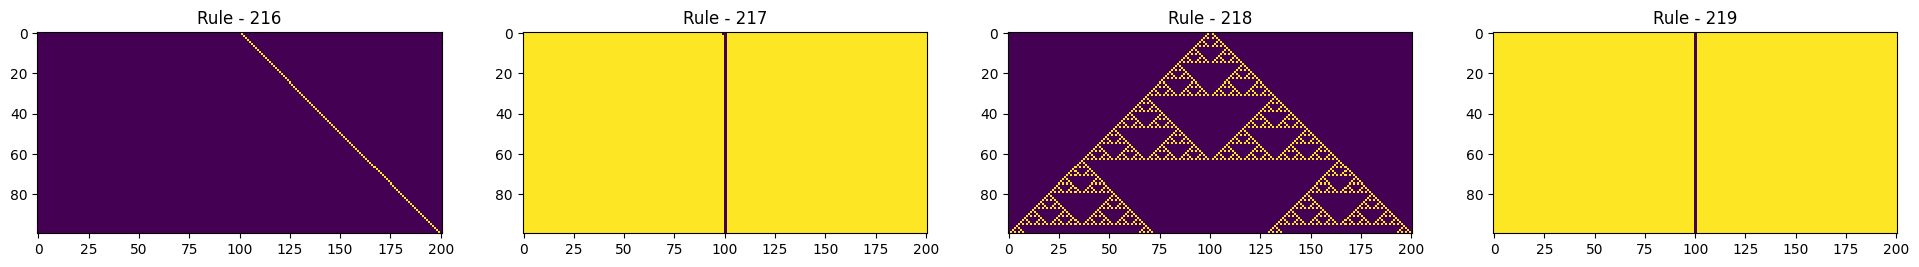

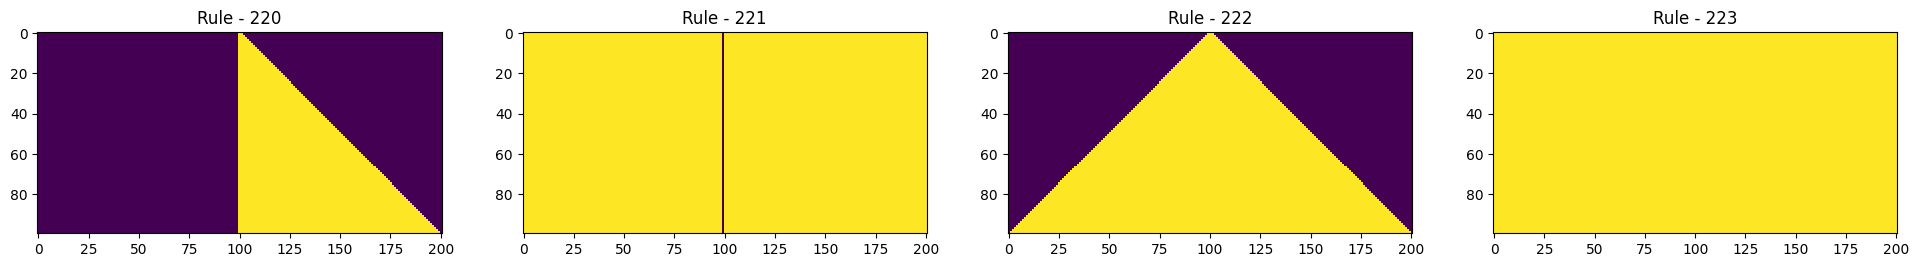

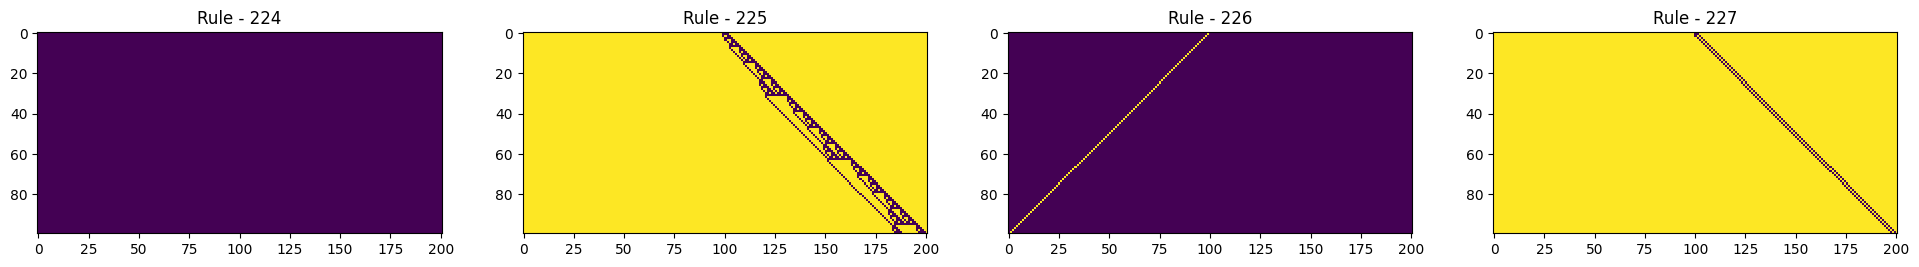

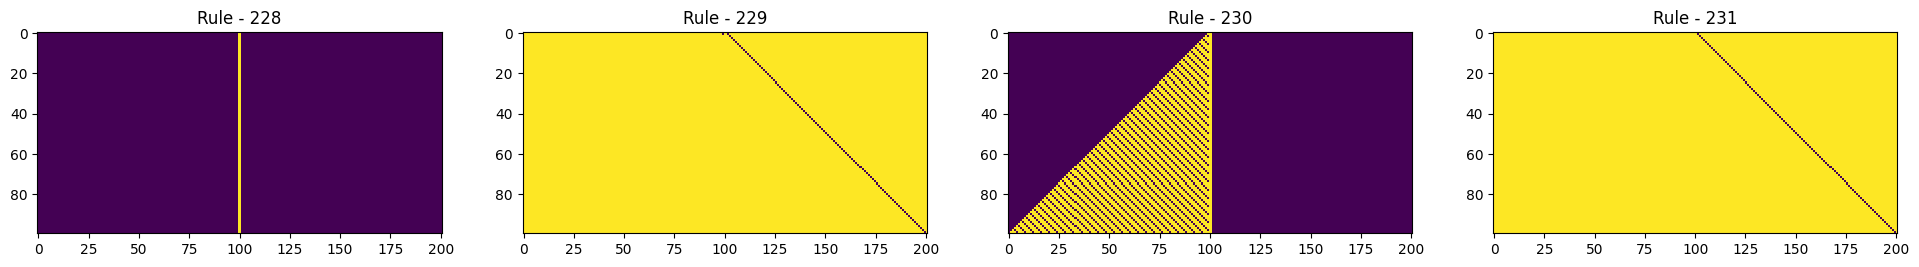

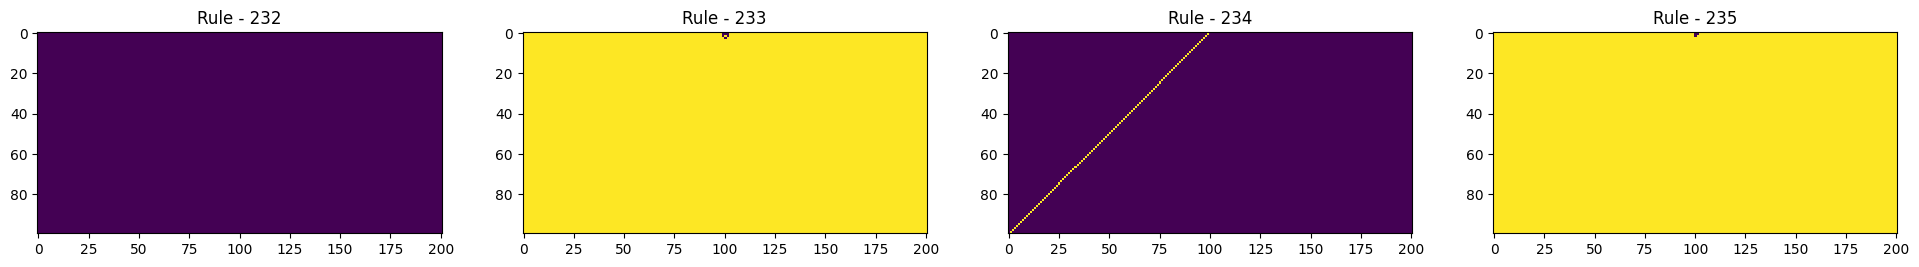

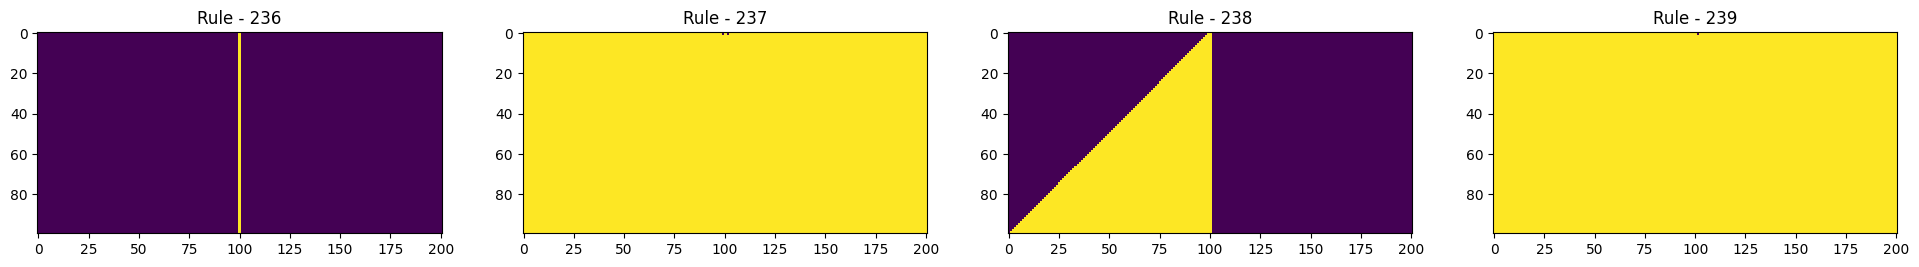

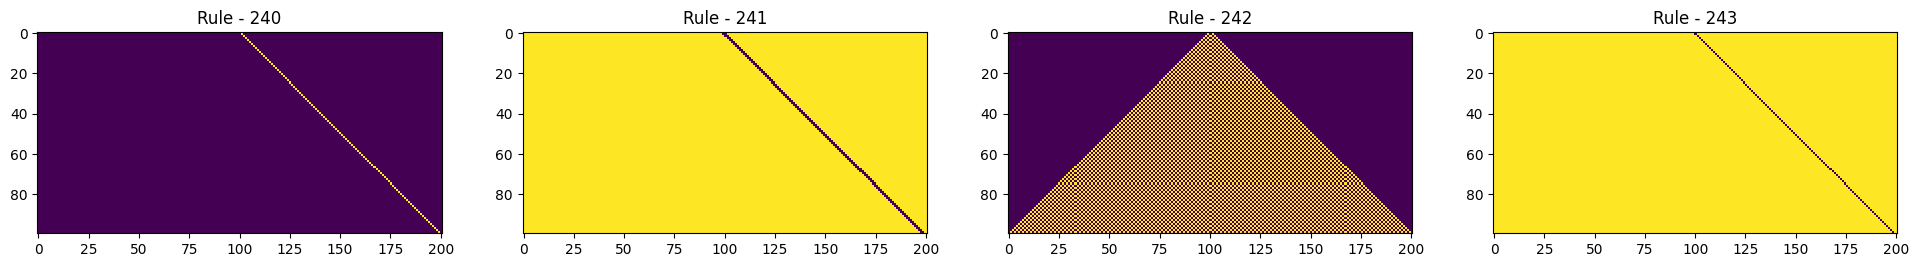

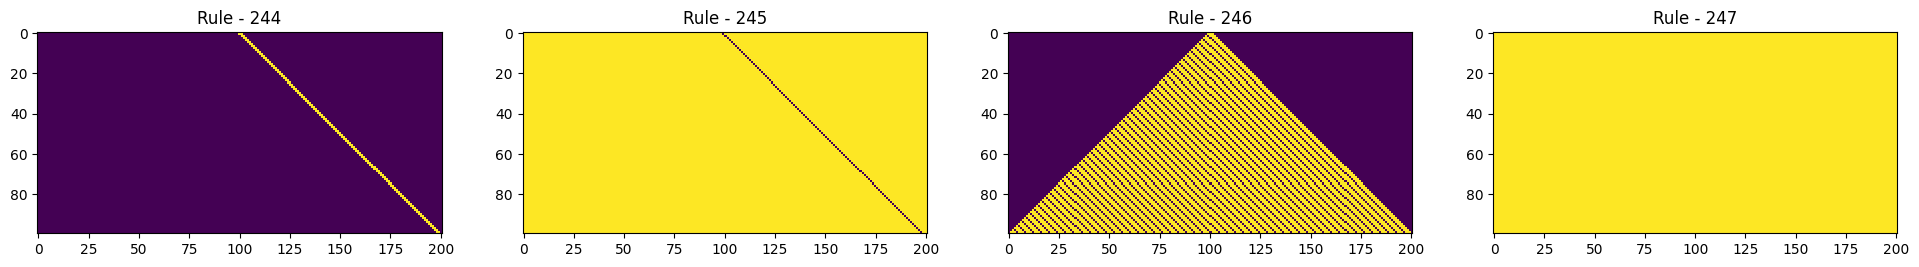

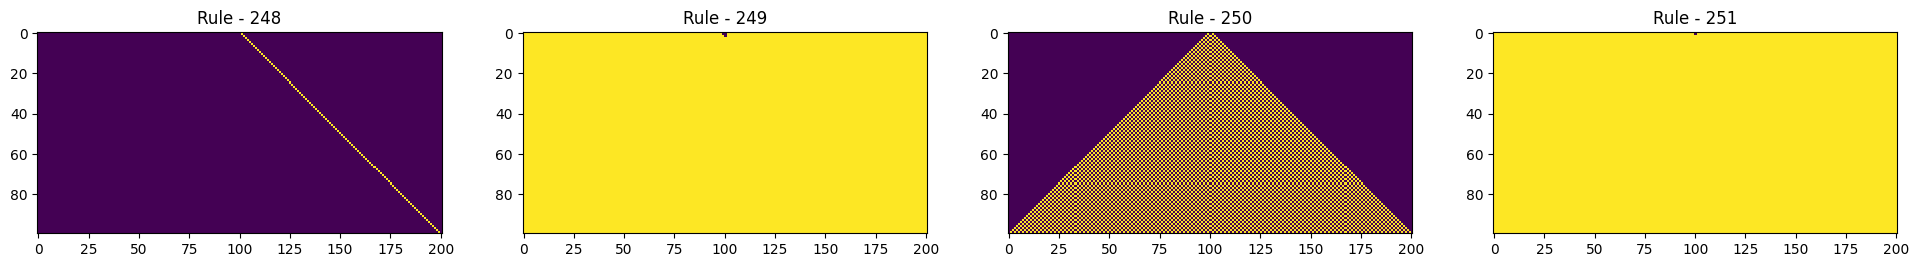

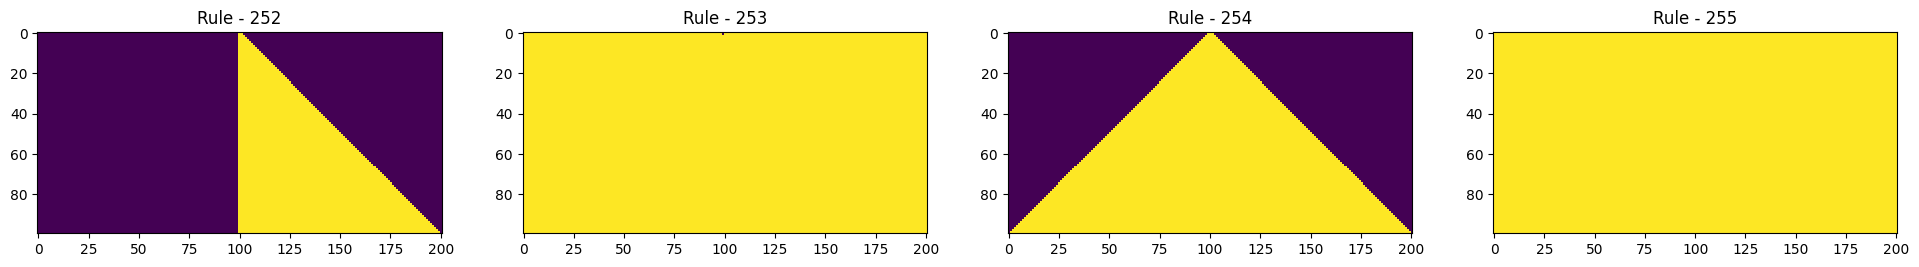

In [85]:
automata = Automata()

for x in range(64):
    fig, ax = plt.subplots(1, 4, figsize=(24,18))
    for j in range(4):
        ax[j].imshow(automata.simulate((x * 4) + j), interpolation='nearest')
        ax[j].set_title(f"Rule - {(x * 4) + j}")
    plt.show()